# Projeto Detectando Spam

#### Imports

In [249]:
# Caso precise rode sómente uma vez

#nltk.download('stopwords')  # remova a primeira cerquilha dessa linha

In [250]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Expressões regulares para limpeza de texto
import re

# NLTK para stopwords
import nltk
from nltk.corpus import stopwords

# Vetorização de texto
from sklearn.feature_extraction.text import TfidfVectorizer

# Divisão de dados
from sklearn.model_selection import train_test_split

# Modelo de classificação
from sklearn.naive_bayes import MultinomialNB

# Avaliação do modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Base de dados

In [252]:
# Caminho onde estiver a pasta SMSSpamCollection
caminho = r'C:\Users\julio\OneDrive\Área de Trabalho\Portifolio_DataScience\base_dados\SMSSpamCollection'

# Criando Data Frame
df_base = pd.read_csv(
    caminho,
    sep='\t', 
    header=None, 
    names=['label', 'message']
)

df_base.head(3)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


### Análise exploratória

In [254]:
df_base['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

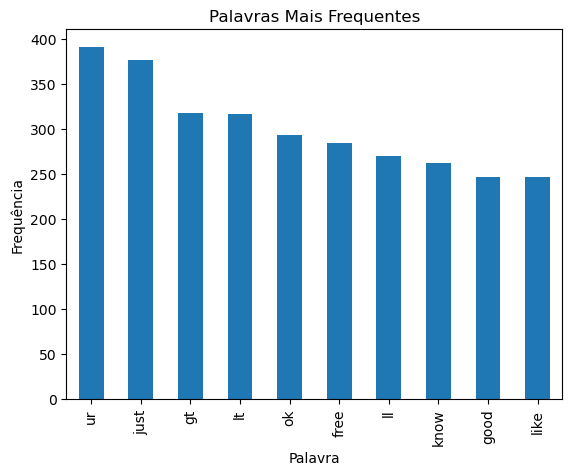

In [255]:
# Instanciando o CountVectorizer para extrair palavras mais comuns
vetorizador = CountVectorizer(stop_words='english', max_features=10)

# Transformando as mensagens em uma matriz de palavras
X = vetorizador.fit_transform(df_base['message'])

# Criando um DataFrame com as palavras mais comuns
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq.sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Palavras Mais Frequentes')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.show()

## Pré-Processamento

In [257]:
# Transformando os rótulos categóricos em numéricos

df_base['label'] = df_base['label'].map({'ham':0, 'spam':1})
df_base.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [258]:
# deixando todos os caracteres em minúsculo 

df_base['message'] = df_base['message'].str.lower()

# removendo acentos e caracteres especiais

df_base['message'] = df_base['message'].apply(
    lambda x: re.sub(r'^a-z\s', '', x)
)
df_base.head(2)

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...


In [259]:
# Removendo Stopwords
stop_words = set(stopwords.words('english'))

df_base['message'] = df_base['message'].apply(
    lambda x: ' '.join([palavra for palavra in x.split() if palavra not in stop_words])
)
df_base.head(2)

,label,message
0,0,"go jurong point, crazy.. available bugis n gre..."
1,0,ok lar... joking wif u oni...


In [260]:
# Vetorização com TF-IDF

vetor = TfidfVectorizer()
X = vetor.fit_transform(df_base['message'])

## Modelo

In [262]:
# Separando X e Y para treino e teste 

y = df_base['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [263]:
# treinando Modelo Naive Bayes

modelo = MultinomialNB()
modelo.fit(X_train, y_train)

MultinomialNB()

In [264]:
# Avaliação do Modelo

y_pred = modelo.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))


Acurácia: 0.9713004484304932
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       963
           1       1.00      0.79      0.88       152

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Matriz de Confusão:
 [[963   0]
 [ 32 120]]
